In [1]:
# Load local and global algorithms
from localgraphclustering.graph import * # Loads graph class.
from localgraphclustering.localCluster import * # Loads localCluster class
from localgraphclustering.sweepCut import * # Loads SweepCut class.
from localgraphclustering.multiclass_label_prediction import * # Loads the multi class label prediction primitive.
from localgraphclustering.eig2_nL import *


# Load standard python APIs
import time

# How to use the graph class and it primitives

In [2]:
# Check documentation for variables in the graph class
help(graph.__init__)

Help on method __init__ in module localgraphclustering.graph:

__init__(self) unbound localgraphclustering.graph.graph method
    CLASS VARIABLES
    ---------------
    
    1) A: sparse row format matirx
          Adjacency matrix
    
    2) d: floating point numpy vector 
          Degrees vector
    
    3) dn: floating point numpy vector 
           Component-wise reciprocal of degrees vector
    
    4) d_sqrt: floating point numpy vector
               Component-wise square root of degrees vector
    
    5) dn_sqrt: floating point numpy vector 
                Component-wise reciprocal of sqaure root degrees vector
    
    6) vol_G: floating point scalar 
              Volume of graph
    
    7) dangling: interger numpy array
                 Nodes with zero edges
    
    8) components: list of sets 
                   Each set contains the indices of a connected component of the graph
    
    9) number_of_components: integer
                             Number of connecte

In [3]:
# Example on how to check documentation for a primitive in the graph class.
help(graph.read_graph)

Help on method read_graph in module localgraphclustering.graph:

read_graph(self, filename, separator) unbound localgraphclustering.graph.graph method
    DESCRIPTION
    -----------
    
    Reads the graph from an edgelist and initialize the adjecancy matrix which is stored variable g.A,
    where g is graph object.
    
    Call help(graph.__init__) to get the documentation for the variables of this class.



In [4]:
# To get the names of other primitives from the graph class run
graph.__dict__

{'__doc__': None,
 '__init__': <function localgraphclustering.graph.__init__>,
 '__module__': 'localgraphclustering.graph',
 'biconnected_components': <function localgraphclustering.graph.biconnected_components>,
 'biconnected_ncp': <function localgraphclustering.graph.biconnected_ncp>,
 'compute_statistics': <function localgraphclustering.graph.compute_statistics>,
 'connected_components': <function localgraphclustering.graph.connected_components>,
 'core_number': <function localgraphclustering.graph.core_number>,
 'is_disconnected': <function localgraphclustering.graph.is_disconnected>,
 'ncp': <function localgraphclustering.graph.ncp>,
 'ncp_one_component': <function localgraphclustering.graph.ncp_one_component>,
 'plot_biconnected_ncp': <function localgraphclustering.graph.plot_biconnected_ncp>,
 'plot_ncp': <function localgraphclustering.graph.plot_ncp>,
 'plot_one_component_ncp': <function localgraphclustering.graph.plot_one_component_ncp>,
 'read_graph': <function localgraphclus

In [5]:
# Define graph object
g = graph()

In [6]:
# Read graph from edgelist file.
g.read_graph('JohnsHopkins.edgelist','\t')

('The following nodes have no outgoing edges:', array([ 699,  976,  981, 1280, 1415, 1543, 1664, 2020, 2355, 2652, 2862,
       2916, 3397, 3516, 3831, 3970, 4118, 4601, 4615, 4809, 4828, 4881,
       4946]), '\n')
These nodes are stored in the your_graph_object.dangling.
To avoid numerical difficulties we connect each dangling node to another randomly chosen node.


In [7]:
# Check if graph is disconnected.
is_disconnected = g.is_disconnected()

('There are ', 1, ' connected components in the graph')
The graph is not a disconnected graph.


In [8]:
# Find all connected components of a graph and store them
# as a list of sets in g.components. 
# This functions calls networkx.
g.connected_components()

('There are ', 1, ' connected components in the graph')


In [9]:
# Find all biconnected components of graph and store them
# as a list of sets in g.bicomponents.
# This functions calls networkx.
g.biconnected_components()

In [10]:
# Find the core number for each node and store them in a
# a dictionary keyed by node to the core number. You can access this by g.core_numbers.
# This functions calls networkx.
g.core_number()

# How to use the localCluster class and its primitives

In [11]:
# Check documentation for variables in the graph class
help(localCluster.__init__)

Help on method __init__ in module localgraphclustering.localCluster:

__init__(self) unbound localgraphclustering.localCluster.localCluster method
    CLASS VARIABLES 
    ---------------
    
    1) node_embedding_acl: numpy array, float
                           1D node embedding for each node of the graph when using ACL primitive.
    
    2) best_cluster_acl: list
                         A list of nodes that correspond to the cluster with the best 
                         conductance that was found by ACL primitive.
    
    3) best_conductance_acl: float
                             Conductance value that corresponds to the cluster with the best 
                             conductance that was found by ACL primitive.
    
    4) sweep_profile_acl: list of objects
                          A two dimensional list of objects. For example,
                          sweep_profile[0] contains a numpy array with all conductances for all
                          clusters that were c

In [12]:
# Example on how to check documentation for a primitive in the localCluster class.
help(localCluster.fista)

Help on method fista in module localgraphclustering.localCluster:

fista(self, ref_node, g, alpha=0.15, rho=1e-05, epsilon=1e-06, max_iter=10000, vol_G=-1, max_time=100, cpp=True) unbound localgraphclustering.localCluster.localCluster method
    DESCRIPTION
    -----------
    
    Fast Iterative Soft Thresholding Algorithm (FISTA). This algorithm solves the l1-regularized
    personalized PageRank problem using an accelerated version of ISTA. It rounds the solution 
    using sweep cut.
    
    The l1-regularized personalized PageRank problem is defined as
    
    min rho*||p||_1 + <c,p> + <p,Q*p>
    
    where p is the PageRank vector, ||p||_1 is the l1-norm of p, rho is the regularization parameter 
    of the l1-norm, c is the right hand side of the personalized PageRank linear system and Q is the 
    symmetrized personalized PageRank matrix.    
    
    For details regarding ISTA please refer to: 
    K. Fountoulakis, F. Roosta-Khorasani, J. Shun, X. Cheng and M. Mahoney. Var

In [13]:
# To get the names of other primitives from the localCluster class 
localCluster.__dict__

{'__doc__': None,
 '__init__': <function localgraphclustering.localCluster.__init__>,
 '__module__': 'localgraphclustering.localCluster',
 'acl': <function localgraphclustering.localCluster.acl>,
 'fista': <function localgraphclustering.localCluster.fista>,
 'ista': <function localgraphclustering.localCluster.ista>,
 'page_rank_nibble': <function localgraphclustering.localCluster.page_rank_nibble>}

In [14]:
# Define localCluster object
lc = localCluster()

In [15]:
# First example of local graph clustering.
# Example for ISTA, for documentation about this function call help(localCluster.ista)

# This is the reference node for local graph clustering.
ref_nodes = 3215

start = time.time()

# This line calls ISTA for local graph clustering.
# To check to documentation for the input and output of this function call 
# help(localCluster.ista)
lc.ista(ref_nodes, g, alpha = 1.8e-1, rho = 2.0e-7, epsilon = 1.0e-2, max_iter = 10000, max_time = 10)

end = time.time()
print("Time:", end - start)

('Time:', 3.2762720584869385)


In [16]:
# Second example of local graph clustering
# Example for FISTA, for documentation about this function call help(localCluster.fista)
# This is the fastest algorithm for local graph clustering for this API. 
# This function has been implemented in Python and C++ with Python Wrapper.
# The C++ version requires compilation, for details see HOWTO.txt file.

# This is the reference node for local graph clustering.
ref_nodes = 3215

# Do not use C++ version of FISTA.
cpp = False

start = time.time()

# This line calls the Python version of FISTA for local graph clustering.
# To check to documentation for the input and output of this function call 
# help(localCluster.fista)
lc.fista(ref_nodes, g, alpha = 1.8e-1, rho = 2.0e-7, epsilon = 1.0e-8, max_iter = 10000, max_time = 10, cpp = cpp)

end = time.time()
print("Time (Python version):", end - start)

('Time (Python version):', 3.611436128616333)


In [17]:
# This is the reference node for local graph clustering.
ref_nodes = 3215

# Use C++ version of FISTA.
cpp = True

start = time.time()

# This line calls the C++ version of FISTA for local graph clustering.
# To check to documentation for the input and output of this function call 
# help(localCluster.fista)
lc.fista(ref_nodes, g, alpha = 1.8e-1, rho = 2.0e-7, epsilon = 1.0e-8, max_iter = 10000, max_time = 10, cpp = cpp)  
    
end = time.time()
print("Time (C++ version):", end - start)

('Time (C++ version):', 0.11149096488952637)


In [18]:
# Third example for local graph clustering. 
# Example for ACL, for documentation about this function call help(localCluster.acl)

# This is the reference node for local graph clustering.
ref_nodes = 3215

start = time.time()

# This line calls ACL for local graph clustering.
# To check to documentation for the input and output of this function call 
# help(localCluster.acl)
lc.acl(ref_nodes, g, alpha = 1.8e-2, rho = 2.0e-7, max_iter = 100000, max_time = 10)

end = time.time()
print("Time:", end - start)

ACL: Maximum running time reached
('Time:', 13.175801038742065)


In [19]:
# Forth example for local graph clustering.
# This method requires only the volume of the target cluster to run. 
# Therefore, if the user has knowledge of the volume of the target cluster it might be
# best and more intuitive to use the method PageRank Nibble.
# For documentation about this function call help(localCluster.page_rank_nibble)

# This is the reference node for local graph clustering.
ref_nodes = 3215

# This is the volume of the target cluster
vol = 10000

# Do not use C++ version of PageRank Nibble.
cpp = False

start = time.time()

# This line calls PageRank Nibble for local graph clustering.
# To check to documentation for the input and output of this function call 
# help(localCluster.page_rank_nibble)
lc.page_rank_nibble(g, ref_nodes, vol, phi = 0.5, algorithm = 'fista', epsilon = 1.0e-8, max_iter = 1000, max_time = 100, cpp = cpp)

end = time.time()
print("Time:", end - start)

('Time:', 6.0423572063446045)


In [20]:
# This is the reference node for local graph clustering.
ref_nodes = 3215

# This is the volume of the target cluster
vol = 10000

# Use C++ version of PageRank Nibble.
cpp = True

start = time.time()

# This line calls PageRank Nibble for local graph clustering.
# To check to documentation for the input and output of this function call 
# help(localCluster.page_rank_nibble)
lc.page_rank_nibble(g, ref_nodes, vol, phi = 0.5, algorithm = 'fista', epsilon = 1.0e-8, max_iter = 1000, max_time = 100, cpp = cpp)

end = time.time()
print("Time:", end - start)

('Time:', 1.372680902481079)


# How to use the multi class label prediction primitive

In [21]:
# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

# Use C++ version of FISTA.
cpp = True

start = time.time()

# This function predicts labels for unlabelled nodes. For details refer to:
# D. Gleich and M. Mahoney. Variational 
# Using Local Spectral Methods to Robustify Graph-Based Learning Algorithms. SIGKDD 2015.
# https://www.stat.berkeley.edu/~mmahoney/pubs/robustifying-kdd15.pdf
# To check to documentation for the input and output of this function call 
# help(multiclass_label_prediction)
classes, ranks, diffusions = multiclass_label_prediction(labels, g, alpha = 1.0e-1, rho = 1.0e-14, epsilon = 1.0e-8, max_iter = 10000, max_time = 100, cpp = cpp)

end = time.time()
print("Time:", end - start)

('Time:', 46.85849595069885)


# How to use the Network Community Profile primitives

In [22]:
# Example for NCP for connected components. For documentation call help(graph.ncp)

In [23]:
# Ratio of nodes from each graph component that will be used for calculation of NCP.
# In this case 0.5 times the number of nodes of each connected component will be used.
ratio = 1

# Use C++ version of PageRank Nibble.
cpp = True

start = time.time()

# This line calls the NCP function for all connected components.
# To check to documentation for the input and output of this function call 
# help(graph.ncp)
g.ncp(ratio, algorithm = 'fista', epsilon = 1.0e-4, max_iter = 1000, max_time_ncp = 300, max_time_algorithm = 10, cpp = cpp)

end = time.time()
print("Time:", end - start)

('There are ', 1, ' connected components in the graph')
('Time:', 304.326416015625)


In [24]:
# Plot NCPs

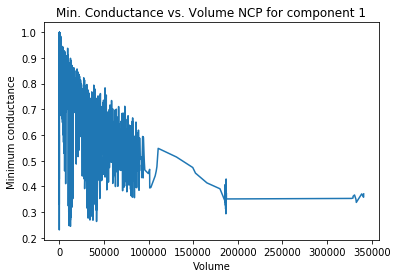

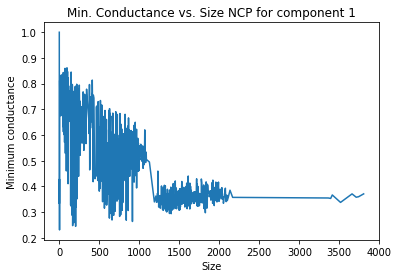

('Time:', 0.41536402702331543)


In [25]:
start = time.time()

g.plot_ncp()

end = time.time()
print("Time:", end - start)

In [ ]:
# Example for NCP for biconnected components. For documentation call help(graph.biconnected_ncp)

In [ ]:
# Ratio of nodes from each graph component that will be used for calculation of NCP.
# In this case 0.5 times the number of nodes of each connected component will be used.
ratio = 0.9

# Use C++ version of PageRank Nibble.
cpp = True

start = time.time()

# This line calls the NCP function for all biconnected components.
# To check to documentation for the input and output of this function call 
# help(graph.biconnected_ncp)
g.biconnected_ncp(ratio, algorithm = 'fista', epsilon = 1.0e-4, max_iter = 1000, max_time_ncp = 300, max_time_algorithm = 10, cpp = cpp)

end = time.time()
print("Time:", end - start)

In [ ]:
# Plot NCPs for biconnected components

In [ ]:
start = time.time()

g.plot_biconnected_ncp()

end = time.time()
print("Time:", end - start)

In [ ]:
# Example for NCP for a given component (list of nodes). For documentation call help(graph.ncp_one_component)

In [ ]:
# Ratio of nodes from each graph component that will be used for calculation of NCP.
# In this case 0.5 times the number of nodes of each connected component will be used.
ratio = 1

# Use C++ version of PageRank Nibble.
cpp = True

start = time.time()

# This line calls the NCP function for a given connected component.
# To check to documentation for the input and output of this function call 
# help(graph.ncp_one_component)
g.ncp_one_component(ratio, g.components[0], algorithm = 'fista', epsilon = 1.0e-4, max_iter = 1000, max_time_ncp = 300, max_time_algorithm = 10, cpp = cpp)

end = time.time()
print("Time:", end - start)

In [ ]:
# Plot NCP for given connected components

In [ ]:
start = time.time()

g.plot_one_component_ncp()

end = time.time()
print("Time:", end - start)

# How to use the sweepCut class and its primitives 

In [ ]:
# Check documentation for variables in the sweepCut class
help(sweepCut.__init__)

In [ ]:
# Example on how to check documentation for a function in the sweepCut class.
help(sweepCut.sweep_cut_cpp)

In [ ]:
# To get the names of other functions from the sweepCut class run
sweepCut.__dict__

In [ ]:
# Define graph object
sweep_object = sweepCut()

In [ ]:
# First example on using the Python version of SweepCut.
start = time.time()

sweep_object.sweep_normalized(lc.node_embedding_fista,g)

end = time.time()
print("Time:", end - start)

In [ ]:
# Second example on using the C++ version of SweepCut
start = time.time()

sweep_object.sweep_cut_cpp(lc.node_embedding_fista,g) 

end = time.time()
print("Time:", end - start)

In [ ]:
# Third example another Python rounding procedure from SweepCut.
start = time.time()

sweep_object.sweep_general(lc.node_embedding_fista,g)

end = time.time()
print("Time:", end - start)

# How to use global clustering method

In [ ]:
node_embedding, best_cluster, best_conductance, sweep_profile = eig2_nL(g, tol_eigs = 1.0e-6)